# Projeto 1: Classificação binária brest cancer

## Etapa 1: Importação das bibliotecas

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
import torch
torch.__version__
#!pip install torch==1.4.0

'2.4.0+cu121'

In [5]:
import torch.nn as nn

## Etapa 2: Base de dados

In [6]:
# setando semente aleatória
np.random.seed(123)
torch.manual_seed(123)

In [9]:
previsores = pd.read_csv('./content/entradas-breast.csv')
classe = pd.read_csv('./content/saidas-breast.csv')

In [11]:
previsores.shape

(569, 30)

In [12]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [34]:
selecao = classe['0'] == 0
classe[selecao]

,0
0,0
1,0
2,0
3,0
4,0
...,...
563,0
564,0
565,0
566,0


In [14]:
np.unique(classe)

array([0, 1])

<Axes: xlabel='0', ylabel='count'>

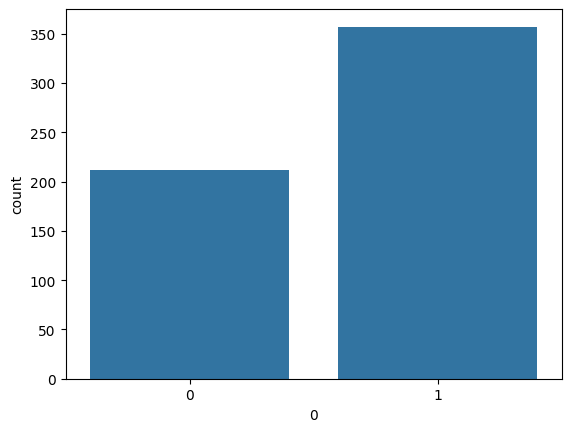

In [36]:
sns.countplot(x = classe['0'])

In [2]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                              classe,
                                                                                              test_size = 0.25)

NameError: name 'train_test_split' is not defined

In [1]:
type(previsores_treinamento.shape)

NameError: name 'previsores_treinamento' is not defined

In [39]:
classe_treinamento.shape

(426, 1)

In [41]:
previsores_teste.shape

(143, 30)

In [42]:
classe_teste.shape

(143, 1)

## Etapa 3: Transformação dos dados para tensores


In [43]:
type(previsores_treinamento)

pandas.core.frame.DataFrame

In [44]:
type(np.array(previsores_treinamento))

numpy.ndarray

In [45]:
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype = torch.float)

In [46]:
type(previsores_treinamento)

torch.Tensor

In [47]:
type(classe_treinamento)

torch.Tensor

In [48]:
# une as duas variaveis em um conjunto só 
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [49]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [50]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

## Etapa 4: Construção do modelo

In [51]:
# 30 -> 16 -> 16 -> 1
# (entradas + saida) / 2 = (30 + 1) / 2 = 16
# linear quer dizer densa 
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

In [52]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [53]:
# binari cross entropy
criterion = nn.BCELoss()

In [54]:
# lr = learning hate
# weight decay : para decair aos poucos para conseguir chegar no mínimo
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

## Etapa 5: Treinamento do modelo

In [55]:
for epoch in range(100):
  running_loss = 0.

  for data in train_loader:
    inputs, labels = data
    #print(inputs)
    #print('-----')
    #print(labels)
    optimizer.zero_grad() #zera o gradiente para nao acumular

    outputs = classificador(inputs) # classificador.forward(inputs) - previsoes
    #print(outputs)
    loss = criterion(outputs, labels) #calculo do erro das previsioes
    #print(loss)
    loss.backward() # backpropagation 
    optimizer.step() # para voltar atualizando os pesos

    running_loss += loss.item()
  print('Época %3d: perda %.5f' % (epoch+1, running_loss/len(train_loader)))

Época   1: perda 10.78336
Época   2: perda 2.84864
Época   3: perda 1.67480
Época   4: perda 1.11414
Época   5: perda 0.63996
Época   6: perda 0.63753
Época   7: perda 0.58066
Época   8: perda 0.55460
Época   9: perda 0.55617
Época  10: perda 0.53322
Época  11: perda 0.55797
Época  12: perda 0.53816
Época  13: perda 0.52938
Época  14: perda 0.33227
Época  15: perda 0.51360
Época  16: perda 0.35532
Época  17: perda 0.49602
Época  18: perda 0.33208
Época  19: perda 0.29349
Época  20: perda 0.25046
Época  21: perda 0.29527
Época  22: perda 0.49888
Época  23: perda 0.47241
Época  24: perda 0.45883
Época  25: perda 0.27544
Época  26: perda 0.23399
Época  27: perda 0.26373
Época  28: perda 0.24136
Época  29: perda 0.28275
Época  30: perda 0.22633
Época  31: perda 0.19294
Época  32: perda 0.22258
Época  33: perda 0.20290
Época  34: perda 0.20888
Época  35: perda 0.20335
Época  36: perda 0.20316
Época  37: perda 0.18855
Época  38: perda 0.22316
Época  39: perda 0.23315
Época  40: perda 0.19261

## Etapa 6: Visualização dos pesos

In [56]:
# 30 -> 16 -> 16 -> 1
params = list(classificador.parameters())

In [57]:
params

[Parameter containing:
 tensor([[-6.9327e-02, -6.5608e-02, -1.7668e-01,  5.0619e-02, -1.5432e-01,
           9.9403e-02, -1.3655e-01, -1.2683e-01, -2.2502e-01,  1.7858e-01,
          -3.5831e-02,  5.3264e-02, -1.2382e-01, -1.1018e-01, -1.6242e-03,
          -2.2239e-01, -3.9097e-01, -4.2912e-03,  1.1434e-01,  1.3120e-03,
           1.4040e-01, -3.9942e-02, -3.6662e-02,  1.3844e-01,  4.9201e-01,
           1.2918e-01, -1.8521e-01,  5.5129e-02,  2.9564e-01,  5.0145e-02],
         [ 1.9549e-01,  2.0700e-01,  2.8711e-01,  9.7950e-02, -1.2939e-01,
          -8.6149e-02, -7.1402e-02, -1.3798e-01, -3.2668e-02,  2.6224e-01,
          -6.4298e-02, -9.0209e-02, -7.4134e-03,  1.6780e-01, -6.3848e-03,
          -9.5674e-02, -1.1236e-02,  1.8277e-01,  4.2499e-02, -1.6785e-02,
           9.8577e-02,  6.0318e-02,  1.9006e-01,  7.5953e-03, -1.5371e-02,
          -2.4779e-01, -1.7234e-01, -6.9199e-04, -6.7060e-02, -1.6898e-01],
         [-1.2048e-02, -4.0686e-02, -2.4179e-01, -1.0302e-01, -6.1449e-03,


In [58]:
# 30 -> 16 -> 16 -> 1
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [59]:
print(pesos0)

Parameter containing:
tensor([[-6.9327e-02, -6.5608e-02, -1.7668e-01,  5.0619e-02, -1.5432e-01,
          9.9403e-02, -1.3655e-01, -1.2683e-01, -2.2502e-01,  1.7858e-01,
         -3.5831e-02,  5.3264e-02, -1.2382e-01, -1.1018e-01, -1.6242e-03,
         -2.2239e-01, -3.9097e-01, -4.2912e-03,  1.1434e-01,  1.3120e-03,
          1.4040e-01, -3.9942e-02, -3.6662e-02,  1.3844e-01,  4.9201e-01,
          1.2918e-01, -1.8521e-01,  5.5129e-02,  2.9564e-01,  5.0145e-02],
        [ 1.9549e-01,  2.0700e-01,  2.8711e-01,  9.7950e-02, -1.2939e-01,
         -8.6149e-02, -7.1402e-02, -1.3798e-01, -3.2668e-02,  2.6224e-01,
         -6.4298e-02, -9.0209e-02, -7.4134e-03,  1.6780e-01, -6.3848e-03,
         -9.5674e-02, -1.1236e-02,  1.8277e-01,  4.2499e-02, -1.6785e-02,
          9.8577e-02,  6.0318e-02,  1.9006e-01,  7.5953e-03, -1.5371e-02,
         -2.4779e-01, -1.7234e-01, -6.9199e-04, -6.7060e-02, -1.6898e-01],
        [-1.2048e-02, -4.0686e-02, -2.4179e-01, -1.0302e-01, -6.1449e-03,
          4.96

In [60]:
# 30 -> 16 -> 16 -> 1
bias0 = params[1]
bias0.shape

torch.Size([16])

In [61]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [62]:
bias1 = params[3]
bias1.shape

torch.Size([16])

## Etapa 7: Avaliação do modelo

In [63]:
# coloca o classificador como modo de avaliação
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [65]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [66]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)

In [67]:
type(previsores_teste)

torch.Tensor

In [68]:
previsoes = classificador.forward(previsores_teste)

In [70]:
previsoes

tensor([[9.9355e-01],
        [1.0000e+00],
        [3.6576e-01],
        [9.5613e-01],
        [1.7193e-04],
        [8.6620e-01],
        [9.5629e-01],
        [9.9984e-01],
        [6.8121e-01],
        [6.8945e-01],
        [9.4789e-01],
        [9.9813e-01],
        [8.9354e-01],
        [9.9553e-01],
        [9.9704e-01],
        [8.5391e-01],
        [9.9631e-01],
        [1.0000e+00],
        [3.8023e-01],
        [9.9742e-01],
        [8.3553e-10],
        [1.1818e-02],
        [4.8342e-01],
        [1.0000e+00],
        [9.1356e-01],
        [5.3865e-03],
        [8.6497e-01],
        [1.0000e+00],
        [2.4472e-04],
        [9.9782e-01],
        [5.5634e-01],
        [9.9999e-01],
        [8.9235e-01],
        [9.8796e-01],
        [4.3623e-01],
        [9.9818e-01],
        [6.4472e-01],
        [9.9853e-01],
        [9.9761e-01],
        [4.9669e-05],
        [7.6495e-03],
        [9.2132e-01],
        [1.3711e-07],
        [3.2506e-01],
        [8.6432e-05],
        [6

In [71]:
previsoes = np.array(previsoes > 0.5)
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [72]:
classe_teste

,0
333,1
273,1
201,0
178,1
85,0
...,...
230,0
282,0
535,0
436,1


In [73]:
taxa_acerto = accuracy_score(classe_teste, previsoes)
taxa_acerto

0.8951048951048951

In [74]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[43, 11],
       [ 4, 85]])

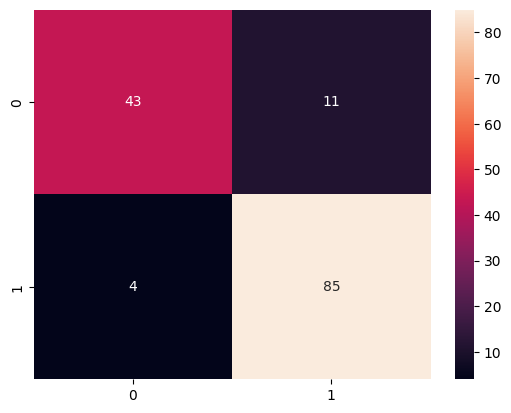

In [75]:
sns.heatmap(matriz, annot=True)